## Parabolic PDE: 1D Unsteady Heat equation with Forward Euler (Explicit method)

We solve the unsteady heat equation presented in Lecture 2 of Q2. We consider heat transfer across the wall of a steel tube.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Physical parameters
L = 0.01  # Tickness of the wall (1 cm)
Nx = 51   # Number of spatial points
dx = L / (Nx - 1)  # Spatial step size
x = np.linspace(0, L, Nx)

T_process = 500  # Temperature at x=0 (degrees Celsius)
T_cooling = 200  # Temperature at x=L (degrees Celsius)

# Thermal properties of steel
rho = 8050      # Density (kg/m^3)
Cp = 490        # Specific heat capacity (J/kg·K)
k = 43          # Thermal conductivity (W/m·K)
alpha = k / (rho * Cp)  # Thermal diffusivity (m^2/s)

# Time parameters
t_max = 3       # Total simulation time (seconds)
dt = 0.0001     # Time step size (seconds)
Nt = int(t_max / dt)  # Number of time steps
t = np.linspace(0, t_max, Nt)

# Stability criterion for explicit scheme
Fo = alpha * dt / dx**2
if Fo > 0.5:
    print("Warning: CFL condition not satisfied. The scheme may be unstable. Consider reducing dt or increasing dx.")

# Initial temperature distribution
temperature = np.ones(Nx) * T_cooling  # Initialize with coolant temperature
temperature[0] = T_process  # Boundary condition at x=0

# Array to record temperature profiles at each time step
T_record = []

# Time-stepping loop using Forward Euler method
for n in range(Nt):
    Tn = temperature.copy()
    # Compute the temperature at interior points
    temperature[1:Nx-1] = Tn[1:Nx-1] + Fo * (Tn[2:Nx] - 2 * Tn[1:Nx-1] + Tn[0:Nx-2])
    # Reapply boundary conditions
    temperature[0] = T_process
    temperature[-1] = T_cooling
    # Record temperature every 100 time steps
    if n % 100 == 0:
        T_record.append(temperature.copy())

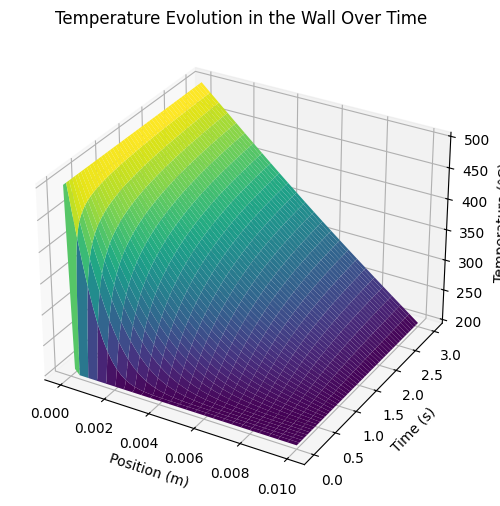

In [3]:
# Convert recorded temperatures to a NumPy array
T_record = np.array(T_record)
time_steps = np.linspace(0, t_max, len(T_record))

# Surface plot of temperature evolution
X, Y = np.meshgrid(x, time_steps)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, T_record, cmap='viridis')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Temperature Evolution in the Wall Over Time')
plt.show()

In [4]:
# Animated plot of temperature profile over time
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, T_record[0], color='r')
ax.set_xlim(0, L)
ax.set_ylim(T_cooling - 10, T_process + 10)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Profile Evolution')
plt.close()

# Create and save GIF showing the evolution of the temperature profile
def animate(i):
    line.set_ydata(T_record[i])
    ax.set_title(f'Temperature Profile at t = {time_steps[i]:.2f} s')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(T_record), interval=50, blit=True)

# Save the animation as a GIF
ani.save('temperature_evolution.gif', writer='pillow', fps=20)